https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

In [39]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sb


In [41]:
df = pd.read_csv('AI_Human.csv')

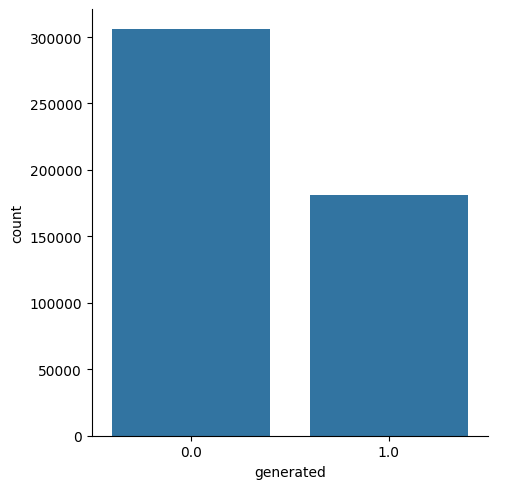

In [ ]:
df.head
sb.catplot(x = 'generated', kind = 'count', data = df)


The data set is a set of essays which have either been AI generated or written by humans. The data set seems to be 2/3's human vs 1/3 AI generated. This model should be able to predict whether or not an essay was AI generated or not.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words = stopwords, binary=True)

In [ ]:
X = df.text
y = df.generated

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1234)

In [51]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [61]:
X_train_vectorized.shape

(389788, 227114)

In [52]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
pred = naive_bayes.predict(X_test_vectorized)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60058   924]
 [ 3340 33125]]
Accuracy Score:  0.9562428807454308
Precision Score:  0.9728626391377133
Recall Score:  0.9084053201700261
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     60982
         1.0       0.97      0.91      0.94     36465

    accuracy                           0.96     97447
   macro avg       0.96      0.95      0.95     97447
weighted avg       0.96      0.96      0.96     97447



Judging the Naive bayes algorithm on unmodified data it seems to be very accurate.

In [54]:
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.pipeline import Pipeline

pipe1 = Pipeline([
        ('tfidf', TfidfVectorizer(binary=True)),
        ('logreg', LogisticRegression(solver='lbfgs', class_weight='balanced')),
])
pipe1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(binary=True)),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [55]:
pred = pipe1.predict(X_test)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60650   332]
 [  410 36055]]
Accuracy Score:  0.9923856044824366
Precision Score:  0.9908758622584989
Recall Score:  0.9887563416975181
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     60982
         1.0       0.99      0.99      0.99     36465

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



Judging the logistic regression algorithm on the unaltered data it seems to be highly accurate  achieving nearly .99 in every metric making it more accurate than naive bayes

In [58]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (15,2), random_state = 1234)
classifier.fit(X_train_vectorized, y_train)

KeyboardInterrupt: 

In [42]:
pred = classifier.predict(X_test_vectorized)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60840   142]
 [  140 36325]]
Accuracy Score:  0.9971061192237832
Precision Score:  0.9961060685002879
Recall Score:  0.996160702043055
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60982
         1.0       1.00      1.00      1.00     36465

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447



The neural network has done the best with this classification task achieving near perfect scores. It did take by far the longest to create the model nearing 10 minutes. This could be reduced by making the layers smaller but that is something we shall test later in this notebook.

Now I will try to optimize parameters and see if I get better results than just leaving it alone

For Naive bayes we shall try using the Bernoulli version instead of multinomial.

In [45]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_vectorized, y_train)

BernoulliNB()

In [46]:
pred = naive_bayes.predict(X_test_vectorized)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[59805  1177]
 [ 3173 33292]]
Accuracy Score:  0.9553603497285704
Precision Score:  0.9658533754968233
Recall Score:  0.9129850541615248
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     60982
         1.0       0.97      0.91      0.94     36465

    accuracy                           0.96     97447
   macro avg       0.96      0.95      0.95     97447
weighted avg       0.96      0.96      0.96     97447



Using bernoulli Naive Bayes resulted in a mixed bag of results. The precision and recall scores were pulled closer to each other compared to the multinomial Naive bayes. Overall the Accuracy was very slightly higher while the precision was just over a whole percentage point lower and the recall score was just over a whole percentage point higher.

Next we shall try to vary the logistic regression algorithm

In [59]:
pipe2 = Pipeline([
        ('tfidf', TfidfVectorizer(binary=True)),
        ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced', random_state= 1234)),
])
pipe2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(binary=True)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=1234,
                                    solver='liblinear'))])

In [60]:
pred = pipe2.predict(X_test)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60849   133]
 [  189 36276]]
Accuracy Score:  0.9966956396810573
Precision Score:  0.9963470570463347
Recall Score:  0.9948169477581242
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60982
         1.0       1.00      0.99      1.00     36465

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447



Comparing the liblinear solver to the lbgfs solver it seems that for this dataset the the liblinear solver is superior. It has better marks for all statistics over the lbgfs solver. It has better accuracy, recall and precision. 

The Last thing we shall try is varying the neural network parameters. I will try to reduce the node count for the first layer and also split it up into another layer.

In [62]:
classifier = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (5,5,2), random_state = 1234)
classifier.fit(X_train_vectorized, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 2), random_state=1234, solver='lbfgs')

In [63]:
pred = classifier.predict(X_test_vectorized)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60937    45]
 [   58 36407]]
Accuracy Score:  0.9989430151774811
Precision Score:  0.9987654998354
Recall Score:  0.9984094337035514
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60982
         1.0       1.00      1.00      1.00     36465

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447



Adjusting the layers from (15, 2) to (5,5,2) made great improvements to the nn. It both increased all the scores and reduced the time to fit the model from over 10 minutes to just under 3. Next I shall see how it performs with the same amount of nodes but this time the first layer is not split up.

In [66]:
classifier = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (10,2), random_state = 1234)
classifier.fit(X_train_vectorized, y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), random_state=1234, solver='lbfgs')

In [67]:
pred = classifier.predict(X_test_vectorized)
print(confusion_matrix(y_test, pred))
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print(classification_report(y_test, pred))

[[60932    50]
 [   66 36399]]
Accuracy Score:  0.9988096093260952
Precision Score:  0.9986282202529562
Recall Score:  0.9981900452488688
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60982
         1.0       1.00      1.00      1.00     36465

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447



The first thing that combining the first two layers did wasincrease the time it took to generate the model. It took 1.5 times as long to generate. It was also less acurate with lower scores overall.

CONCLUSION
The Naive Bayes model was very quick to train taking seconds to finish. Logistic regression was slower taking a couple minutes to finish. Using a Neural network was the longest to finish but with wildly varying times. It took anywhere from over 10 minutes to just under 3 depending on the number of nodes and layers. The Naive Bayes algorithm performed the worst at only .955 accuracy while the other two models achieved at least .99. The neural network was the best performing as it was able to achieve the highest scores in all marks when the layers were optimized. It achieved an accuracy of .9989 and precision and recall scores of .998 getting only 103 wrong classifications out of 97000.